# Singleton

## Propósito

O padrão singleton tem como principal propósito garantir que uma classe possua apenas uma única instância, enquanto provém um ponto de acesso global para ela.

## Problema
Esse padrão busca resolver dois problemas: o primeiro é de garantir que uma classe possua uma única instância, isso acontece principalmente quando é necessário realizar algum controle de acesso à algum recurso compartilhado, como um banco de dados ou arquivo. O segundo é prover um ponto de acesso global para essa única instância, de forma semelhante ao uso de variáveis globais no código, mas ainda provendo aa proteção contra sobrescrições.

## Solução
Todas as implementações do singleton possuem dois passos:
1 - Definir o construtor padrão da classe como privado, evitando que outros objetos usem o operador new com a classe.
2 - Criar um método de criação estático que atua como um construtor, por trás, esse método chama o construtor privado e salva o novo objeto em um campo estático. Todas as chamadas posteriores a essa primeira declaração irão retornar ou alterar o objeto já salvo.

## Diagrama UML
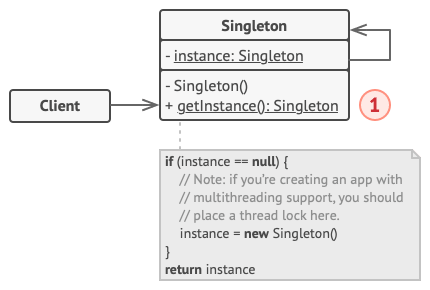

## Exemplo de Implementação do Padrão

O código de exemplo abaixo está em Python, escrito a partir do pseudo-código retirado do site Refactoring Guru, e sua explicação está em forma de comentários:

In [ ]:
class Database:
    #O atributo _instance é um atributo estático para armazenar a única instância
    #da classe Database. Inicialmente, ele é configurado como None, indicando que a instância ainda não foi criada.
    _instance = None

    #O construtor da classe é privado para evitar a criação de múltiplas instâncias diretamente usando o operador new. 
    #Caso isso ocorra, haverá um erro que interromperá o fluxo normal do programa. 
    #Esse comportamento é uma das características chave do padrão Singleton, que visa garantir uma única instância.
    def __init__(self):
        if Database._instance is not None:
            raise Exception("Use get_instance() para obter a instância do singleton.")
        # Código de inicialização, como conexão com o banco de dados.
        # ...

    #O método get_instance é responsável por fornecer acesso à instância única da classe. Ele verifica se a instância já foi criada; 
    #caso contrário, cria uma nova instância. 
    @staticmethod
    def get_instance():
        if Database._instance is None:
            # Bloqueio para evitar problemas de concorrência.
            from threading import Lock
            lock = Lock()
            with lock:
                # Verificar novamente se a instância não foi criada por outro thread.
                if Database._instance is None:
                    Database._instance = Database()
        return Database._instance

    #O método query imula a execução de uma consulta SQL. Ele pode ser estendido para incluir lógica adicional, 
    #como cache de resultados ou controle de taxa de acesso, se necessário.
    def query(self, sql):
        print(f"Executando query: {sql}")
        # ...


class Application:
    @staticmethod
    def main():
        # Obter a instância do singleton.
        foo = Database.get_instance()
        foo.query("SELECT ...")
        # ...
        bar = Database.get_instance()
        bar.query("SELECT ...")
        # `foo` e `bar` referenciam o mesmo objeto.
